Smote technique to optimize imbalanced data set

· Baseline classification model – logistic regression & K-nearest

· XG-Boost model – tune parameters via grid search

· Lean into imbalance data set thing and anomaly detection

Anomaly detection ideas:

- Auto encoder
- DB scan


· Maybe correlate time feature

In [122]:
# !pip install opendatasets

import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split

# %matplotlib
pd.set_option('display.max_columns', None)

### Load Data

- retreived from kaggle portal
- File too large to store in github

In [123]:
dataset_url="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data"

od.download(dataset_url)

Skipping, found downloaded files in "./creditcardfraud" (use force=True to force download)


In [124]:
data_dir = "creditcardfraud"

os.listdir(data_dir)

['creditcard.csv']

In [125]:
creditcard=data_dir + "/creditcard.csv"
data = pd.read_csv(creditcard)

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [55]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [56]:
prop = 492/ 284315
round(prop, 3)

0.002

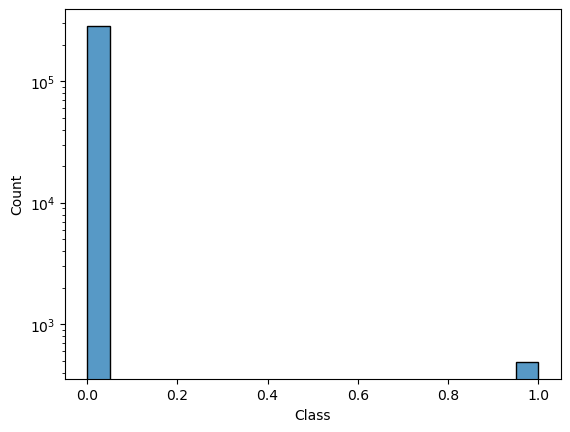

In [57]:
#data imbalance
sns.histplot(data['Class'])
plt.yscale('log')
plt.show()


In [58]:
data.groupby('Class')['Amount'].sum()

Class
0    25102462.04
1       60127.97
Name: Amount, dtype: float64

<Axes: xlabel='Amount', ylabel='Class'>

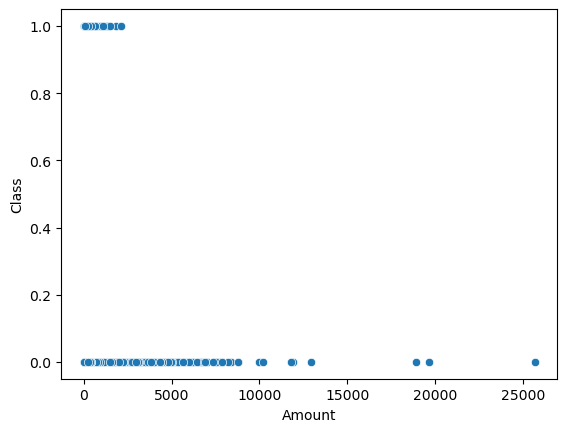

In [59]:
amountClass = data[["Amount", "Class"]]
sns.scatterplot(amountClass, x = "Amount", y= "Class")

In [60]:
amountClass[amountClass.Class==1].Amount.max()

2125.87

In [61]:
amountClass[amountClass.Class==0].Amount

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284315, dtype: float64

/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


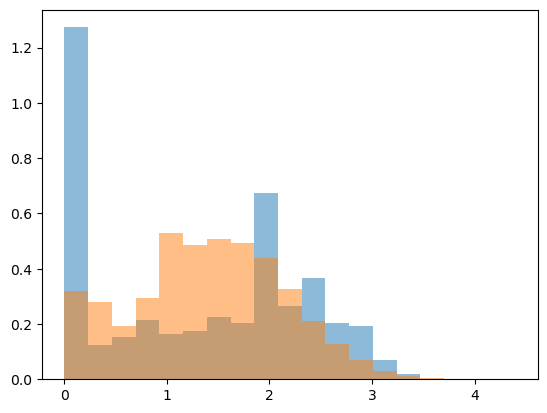

In [62]:
bins = np.linspace(0,np.log10(25000),20)
plt.hist(np.log10(amountClass[amountClass.Class==1].Amount), bins=bins, density=True, alpha=0.5)
plt.hist(np.log10(amountClass[amountClass.Class==0].Amount), bins=bins, density=True, alpha=0.5)
plt.show()

Bringing Amount and Time into the same scale as the rest of the column as not in give a single feature dominance over the other.

May want to use log normalization

Robust Scalar: we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset

In [126]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Assuming 'data' is your pandas DataFrame and 'column_to_exclude' is the column you want to exclude
column_to_exclude = 'Class'

# Drop the column to exclude
data_to_scale = data.drop(columns=[column_to_exclude])

# Apply RobustScaler to the remaining columns
rob_scaler = RobustScaler()
scaled_data = rob_scaler.fit_transform(data_to_scale)

# Convert the scaled data back to a DataFrame
data_scaled = pd.DataFrame(scaled_data, columns=data_to_scale.columns)

# Concatenate the excluded column with the scaled DataFrame
data_scaled[column_to_exclude] = data[column_to_exclude]

# Now you can view the head of the scaled DataFrame
data_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,0.185689,-0.345414,-0.740209,-0.745834,-0.393775,1.152959,-0.541507,0.309758,0.029437,0.437322,0.910463,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274,0
1,-0.994983,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,-0.074854,1.095465,0.903686,0.383407,-0.211569,0.476970,0.400979,-0.055612,-0.179787,-0.163363,-0.019150,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825,0
2,-0.994972,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,0.303796,0.437564,-0.072229,0.557465,-0.235704,1.865539,-2.982344,1.330783,-0.117763,-2.475385,1.703959,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721,0
3,-0.994972,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,0.038374,-0.128974,0.037307,0.397641,-0.368473,-0.551666,-1.135905,-0.700023,1.970088,-1.350843,-0.422194,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291,0
4,-0.994960,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,0.855099,-0.525992,0.388903,1.036898,-1.273801,0.103149,-0.522390,-0.193970,-0.034570,0.873809,1.366227,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579,0


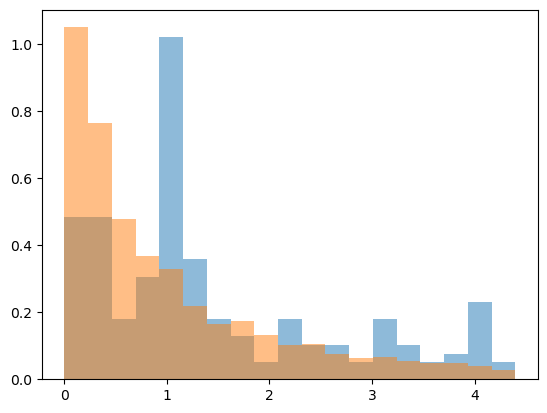

In [16]:
bins = np.linspace(0,np.log10(25000),20)
plt.hist(data_scaled[data_scaled.Class==1].Amount, bins=bins, density=True, alpha=0.5)
plt.hist(data_scaled[data_scaled.Class==0].Amount, bins=bins, density=True, alpha=0.5)
plt.show()

In [64]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Assuming 'data' is your pandas DataFrame and 'column_to_exclude' is the column you want to exclude
column_to_exclude = 'Class'

# Drop the column to exclude
data_to_scale = data.drop(columns=[column_to_exclude])

# Apply RobustScaler to the remaining columns
stand_scaler = RobustScaler()
stand_data = rob_scaler.fit_transform(data_to_scale)

# Convert the scaled data back to a DataFrame
stand_data = pd.DataFrame(stand_data, columns=data_to_scale.columns)

# Concatenate the excluded column with the scaled DataFrame
stand_data[column_to_exclude] = data[column_to_exclude]

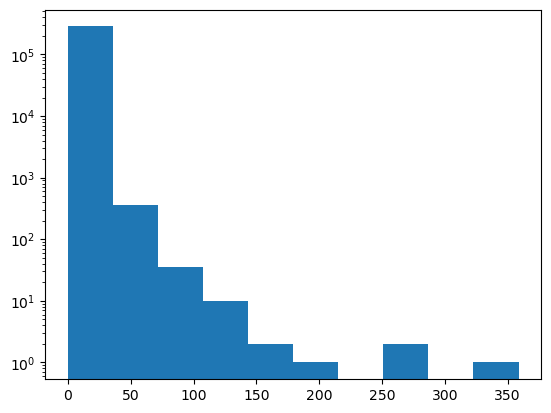

In [65]:
plt.hist(stand_data.Amount)
plt.yscale("log")

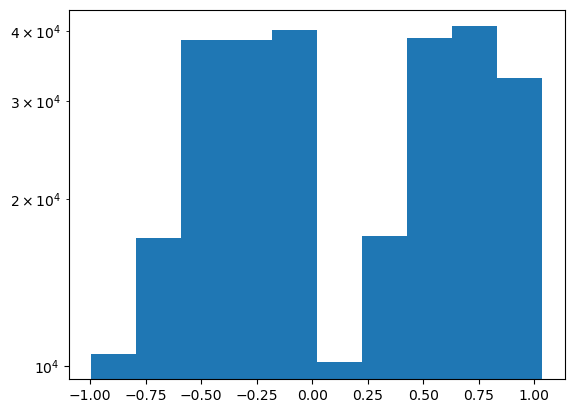

In [66]:
plt.hist(data_scaled.Time)
plt.yscale('log')

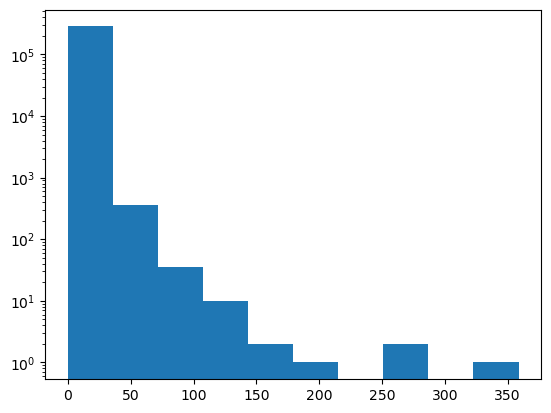

In [67]:
plt.hist(data_scaled.Amount)
plt.yscale('log')

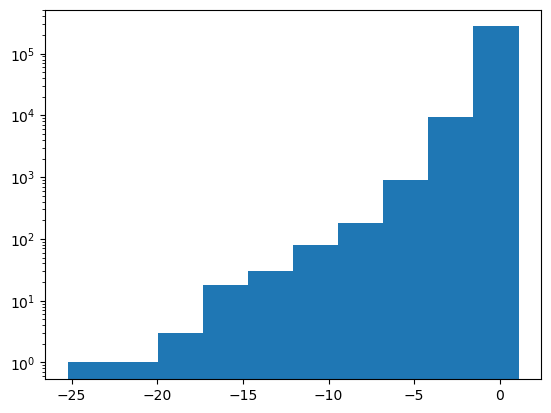

In [68]:
plt.hist(data_scaled.V1)
plt.yscale("log")

In [127]:
# # in our case we may want to have detecting fraud as TP for confusion Matrix, this will allow that to happen
data_scaled["Class"] = data_scaled["Class"].apply(lambda x: 1 if x == 0 else 0)

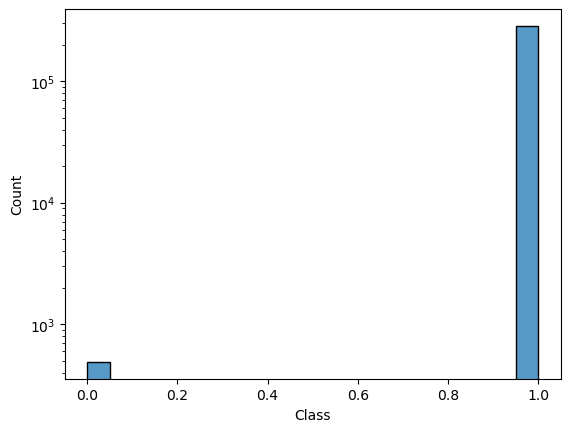

In [97]:
#data imbalance
sns.histplot(data_scaled['Class'])
plt.yscale('log')
plt.show()

In [128]:
X = data_scaled.drop('Class', axis=1)
y = data_scaled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
y

0         1
1         1
2         1
3         1
4         1
         ..
284802    1
284803    1
284804    1
284805    1
284806    1
Name: Class, Length: 284807, dtype: int64

In [100]:
y_train.value_counts()

1    227451
0       394
Name: Class, dtype: int64

In [101]:
y_test.value_counts()

1    56864
0       98
Name: Class, dtype: int64

In [102]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train type:", type(X_train))
print("y_train type:", type(y_train))

X_train shape: (227845, 30)
y_train shape: (227845,)
X_train type: <class 'pandas.core.frame.DataFrame'>
y_train type: <class 'pandas.core.series.Series'>


# Confusion Matrix Overview

TP  FN

FP  TN

*TP:* Transaction is truly fraud

*FP:* Transcation flagged as fraud when it actually wasn't

*TN:* Transaction was not flagged for fraud and it is not a fradulent transaction

*FN:* Transaction was not flagged for fraud but it is fraulent

# Supervised Learning Model

In [129]:
from sklearn.metrics import classification_report, confusion_matrix

In [130]:
def report(y_test, mod):
    # Evaluate performance using classification report
    print(classification_report(y_test, mod))

    # Evaluate performance using confusion matrix
    print(confusion_matrix(y_test, mod))



True:    284315

Fraudulent:       492

# XGBoost

## SMOTE

SMOTE(*,

*sampling_strategy*= float (only for binary), str (in our casue will use either auto or minority), dict or callable, default=’auto’,  

*random_state*= controls randomization,

*k_neighbors*= define the neighborhood of samples
)

In [28]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# xgb = XGBClassifier()

# param_grid = {
#     'C': [0.01, 0.1, 1],
#     "penalty": ['l2', "l2", "elasticnet"]
# }

# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='recall')
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Evaluate the model with the best hyperparameters on the test set
# model = XGBClassifier(**best_params)
# model.fit(X_train, y_train)
# recall = model.score(X_test, y_test)
# print("Test Recall with Best Hyperparameters:", recall)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}

Test Recall with Best Hyperparameters: 0.9995611109160493

In [105]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### baseline

In [106]:
xgb = XGBClassifier()

# Train the classifier
xgb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = xgb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.88      0.82        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.88      0.94      0.91     56962
weighted avg       1.00      1.00      1.00     56962

[[   86    12]
 [   26 56838]]


### fine tuned

In [107]:

# Initialize the KNN classifier
# xgb = XGBClassifier(C=0.01, penalty="l2") # not used

# Train the classifier
xgb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = xgb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.88      0.82        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.88      0.94      0.91     56962
weighted avg       1.00      1.00      1.00     56962

[[   86    12]
 [   26 56838]]


### Adjusted Threshold

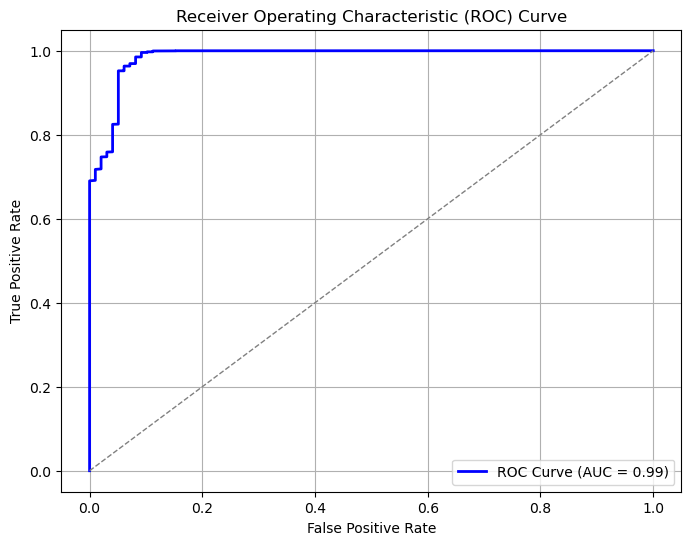

In [108]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (fraud)
y_probs = xgb.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [109]:
# Initialize the KNN classifier
# xgb = XGBClassifier(C=0.01, penalty="l2") # not used

# Train the classifier
xgb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_proba = xgb.predict_proba(X_test)[:, 1]  # Probability of class 0 (fraud)
y_pred = (y_pred_proba > 0.7).astype(int)  # Applying the threshold

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.89      0.78        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.85      0.94      0.89     56962
weighted avg       1.00      1.00      1.00     56962

[[   87    11]
 [   39 56825]]


## boarderlineSMOTE

In [36]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE for oversampling
borderline = BorderlineSMOTE(random_state=42)
X_train_resampled, y_train_resampled = borderline.fit_resample(X_train, y_train)

### baseline

In [37]:
from imblearn.over_sampling import BorderlineSMOTE

boarderline = BorderlineSMOTE(random_state=42, kind= 'borderline-2')
X_train_resampled, y_train_resampled = boarderline.fit_resample(X_train, y_train)

In [38]:
xgb = XGBClassifier()

# Train the classifier
xgb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = xgb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[[   84    14]
 [   12 56852]]


### fine tuned

In [39]:

# Initialize the KNN classifier
# xgb = XGBClassifier(C=0.01, penalty="l2") # not used

# Train the classifier
xgb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = xgb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[[   84    14]
 [   12 56852]]


### Adjusted Threshold

In [40]:
# Initialize the KNN classifier
# xgb = XGBClassifier(C=0.01, penalty="l2") # isn't used

# Train the classifier
xgb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_proba = xgb.predict_proba(X_test)[:, 1]  # Probability of class 0 (fraud)
y_pred = (y_pred_proba > 0.95).astype(int)  # Applying the threshold

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.87      0.78        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.86      0.93      0.89     56962
weighted avg       1.00      1.00      1.00     56962

[[   85    13]
 [   34 56830]]


# ADASYN

### Baseline

In [131]:
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Apply SMOTE for oversampling
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [42]:
xgb = XGBClassifier()

# Train the classifier
xgb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = xgb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.87      0.81        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.88      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962

[[   85    13]
 [   26 56838]]


In [46]:
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the pipeline with ADASYN and model
pipeline = Pipeline([
    ('sampling', ADASYN(random_state=42)),
    ('model', XGBClassifier())  # Instantiate XGBClassifier
])

# Define parameter grid for grid search
# add more if you want to
param_grid = {
    'sampling__n_neighbors': [3, 5],
    'model__booster': ["gbtree", "gblinear"],
    'model__n_estimators': [50, 100],
    'model__max_depth': [5, 7],
    'model__learning_rate': [0.1, 0.01],
    'model__min_child_weight': [1, 5],
    'model__scale_pos_weight': [1, 10]
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# y_pred = grid_search.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)


/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:35:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:36:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:36:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:36:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "mi

Best Parameters: {'model__booster': 'gbtree', 'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__min_child_weight': 1, 'model__n_estimators': 50, 'model__scale_pos_weight': 10, 'sampling__n_neighbors': 3}


In [47]:
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Define the pipeline with ADASYN and model
pipeline = Pipeline([
    ('sampling', ADASYN(random_state=42)),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Define the initial parameter grid
param_grid = {
    'sampling__n_neighbors': [3, 5],
    'model__booster': ["gbtree", "gblinear"],
    'model__n_estimators': [50, 100],
    'model__max_depth': [5, 7],
    'model__gamma': [0.1],
    'model__learning_rate': [0.1, 0.01],
    'model__min_child_weight': [1, 5],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
    'model__scale_pos_weight': [1, 10],
    'model__reg_alpha': [0, 0.1],
    'model__reg_lambda': [1, 10]
}

# Perform initial randomized search
initial_search = RandomizedSearchCV(pipeline, param_distributions=param_grid,
                                    n_iter=20, cv=5, scoring='recall', n_jobs=-1,
                                    random_state=42)

# Fit the randomized search
initial_search.fit(X_train, y_train)

# Print the best parameters from the initial search
print("Initial Best Parameters:", initial_search.best_params_)


/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:42:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:42:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:42:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/xgboost/core.p

Initial Best Parameters: {'sampling__n_neighbors': 3, 'model__subsample': 0.8, 'model__scale_pos_weight': 10, 'model__reg_lambda': 10, 'model__reg_alpha': 0.1, 'model__n_estimators': 50, 'model__min_child_weight': 5, 'model__max_depth': 5, 'model__learning_rate': 0.01, 'model__gamma': 0.1, 'model__colsample_bytree': 1.0, 'model__booster': 'gbtree'}


In [47]:
# Define refined parameter grid around initial best parameters
best_params = initial_search.best_params_
refined_param_grid = {
    'sampling__n_neighbors': [best_params['sampling__n_neighbors']],
    'model__booster': [best_params['model__booster']],
    'model__n_estimators': [max(50, best_params['model__n_estimators'] - 50), best_params['model__n_estimators'], best_params['model__n_estimators'] + 50],
    'model__max_depth': [max(3, best_params['model__max_depth'] - 2), best_params['model__max_depth'], best_params['model__max_depth'] + 2],
    'model__gamma': [best_params['model__gamma']],
    'model__learning_rate': [best_params['model__learning_rate'] * 0.1, best_params['model__learning_rate'], best_params['model__learning_rate'] * 10],
    'model__min_child_weight': [max(1, best_params['model__min_child_weight'] - 2), best_params['model__min_child_weight'], best_params['model__min_child_weight'] + 2],
    'model__subsample': [best_params['model__subsample']],
    'model__colsample_bytree': [best_params['model__colsample_bytree']],
    'model__scale_pos_weight': [best_params['model__scale_pos_weight']],
    'model__reg_alpha': [best_params['model__reg_alpha']],
    'model__reg_lambda': [best_params['model__reg_lambda']]
}

# Perform refined randomized search
refined_search = RandomizedSearchCV(pipeline, param_distributions=refined_param_grid,
                                    n_iter=20, cv=5, scoring='recall', n_jobs=-1,
                                    random_state=42)

# Fit the refined search
refined_search.fit(X_train, y_train)

# Print the best parameters from the refined search
print("Refined Best Parameters:", refined_search.best_params_)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:14:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


Refined Best Parameters: {'sampling__n_neighbors': 3, 'model__subsample': 1.0, 'model__scale_pos_weight': 10, 'model__reg_lambda': 1, 'model__reg_alpha': 0, 'model__n_estimators': 50, 'model__min_child_weight': 5, 'model__max_depth': 3, 'model__learning_rate': 0.1, 'model__gamma': 0.1, 'model__colsample_bytree': 0.8, 'model__booster': 'gblinear'}


Best Parameters: {'model__booster': 'gblinear', 'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__min_child_weight': 1, 'model__n_estimators': 50, 'model__scale_pos_weight': 10}

Best Parameters: {'model__booster': 'gblinear', 'model__gamma': 0.01, 'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__n_estimators': 50, 'sampling__n_neighbors': 3}

Best Parameters: {'model__booster': 'gbtree', 'model__gamma': 0.1, 'model__learning_rate': 0.1, 'model__max_depth': 9, 'model__n_estimators': 200, 'sampling__n_neighbors': 3}

If it takes you too long to run the code above then run code below

In [132]:
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

adasyn = ADASYN(random_state=42, n_neighbors=3)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
xgb = XGBClassifier(booster = 'gblinear', gamma = 0.1, learning_rate= 0.01, max_depth= 9, n_estimators= 200)

# Train the classifier
xgb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = xgb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [20:30:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "gamma", "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.01      0.95      0.03        98
           1       1.00      0.89      0.94     56864

    accuracy                           0.89     56962
   macro avg       0.51      0.92      0.48     56962
weighted avg       1.00      0.89      0.94     56962

[[   93     5]
 [ 6318 50546]]


In [134]:
# Define and initialize ADASYN with the best n_neighbors
# best_n_neighbors = grid_search.best_params_['sampling__n_neighbors']
adasyn = ADASYN(random_state=42, n_neighbors= 3)

# # Resample the training data using ADASYN
X_train_resampled_ADASYN, y_train_resampled_ADASYN = adasyn.fit_resample(X_train, y_train)

adasyn_xgb = pd.concat([pd.DataFrame(X_train_resampled, columns=X_train.columns), pd.Series(y_train_resampled, name='target')], axis=1)

In [77]:
adasyn_xgb

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,0.689153,0.866243,-0.318246,-0.258067,0.219853,-0.349083,0.161107,-0.594108,0.025441,0.891756,0.063149,0.437893,1.515383,0.968204,-0.330750,-0.308326,0.242945,-0.979336,0.655527,0.179461,-0.182470,0.645288,0.897861,0.208088,-0.402433,-0.092224,-0.289894,0.270724,-0.444900,-0.167819,1
1,0.381595,-0.187425,-0.493790,0.717314,-1.254993,-0.040991,0.379221,-0.019692,-0.791038,0.074024,0.711612,-1.273103,-0.846476,0.819542,-1.353996,0.473313,-0.228517,-1.771255,2.111227,-1.853612,-1.183107,-0.299044,0.387449,0.402712,-1.316024,-1.786733,0.729066,-2.296765,-1.188935,0.333962,1
2,0.762145,0.024329,0.538468,-0.386531,-0.433454,0.870514,-0.073053,0.664959,0.177093,-0.064380,-0.551175,0.369278,-0.207852,-0.758684,-0.751967,-0.690114,0.617066,0.124572,0.525736,0.213098,0.216694,-0.687578,-0.821494,0.305614,0.134996,-0.670877,0.302549,1.266659,0.449894,-0.139873,1
3,0.105476,-0.247384,0.676830,0.819183,1.752053,0.425328,1.093924,0.718356,-0.193443,0.341070,0.660548,-0.547691,-4.219203,0.229161,1.328640,-0.860367,1.404358,-0.619844,0.818848,-2.350028,-0.554807,0.224160,0.407738,-0.198912,0.512794,-1.005893,-0.226961,-0.582855,-0.580429,1.333613,1
4,-0.023931,-1.809043,1.306368,-0.317921,-0.006109,-0.614807,-0.176730,-0.423059,2.409441,0.473678,1.328816,0.336454,1.422038,0.603466,0.149211,-0.900094,0.077591,0.083175,-0.052198,0.774610,0.145495,-1.087925,-0.221450,0.846268,0.032014,0.680072,0.523781,1.763981,-2.544321,0.052540,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454861,0.771832,0.820627,0.716067,-1.019804,2.911713,0.633496,-0.107150,-0.072241,0.125091,-0.135750,-0.282270,-0.435741,-1.563767,-1.223089,-4.680365,-1.123088,1.682455,3.390352,1.441931,-2.107376,-0.653625,-0.305953,-0.167341,0.123951,-0.636704,0.062653,0.353831,0.252594,0.223326,-0.293309,0
454862,0.714896,0.833593,0.838457,-1.196447,2.658941,0.994229,-0.254710,0.364588,-0.206616,-0.957574,0.282756,0.574195,-0.622581,-0.359017,-3.331339,-1.006020,1.696973,2.184153,1.324307,-1.969893,-0.404291,-0.009042,-0.001604,0.090082,-0.114119,0.219369,0.253263,-0.052585,0.032275,-0.226694,0
454863,0.683218,0.818910,0.551151,-0.765308,2.508059,0.734283,0.791388,-0.373084,0.452827,-0.507749,0.394262,0.237345,-0.410173,0.269985,-3.454884,-0.638062,2.306039,1.175363,1.828722,-1.993445,-0.122963,0.278239,0.309611,0.171532,-0.072193,-0.123051,0.247628,0.227971,0.116908,-0.120608,0
454864,0.629474,0.828626,0.717285,-0.994894,2.775848,0.725066,0.056231,-0.089016,0.101976,-0.330828,-0.077423,-0.344945,-1.309838,-0.597991,-4.288310,-0.658293,1.847997,2.728238,1.511868,-2.326531,-0.463183,0.118605,0.246499,0.023249,-0.144683,0.127629,0.466412,0.220679,0.205925,-0.278202,0


In [78]:
adasyn_xgb['target'].value_counts()

1    227451
0    227415
Name: target, dtype: int64

# Anomoly Detection

## DBSCAN

*all the anomoly are the same in each file thought it might be easier not to have to switch between the three*
**may not be best for high dimensional datasets**

- eps = distance between two samples
- min_samples = minimal sample in neigbhorhood

<Axes: xlabel='Time', ylabel='Count'>

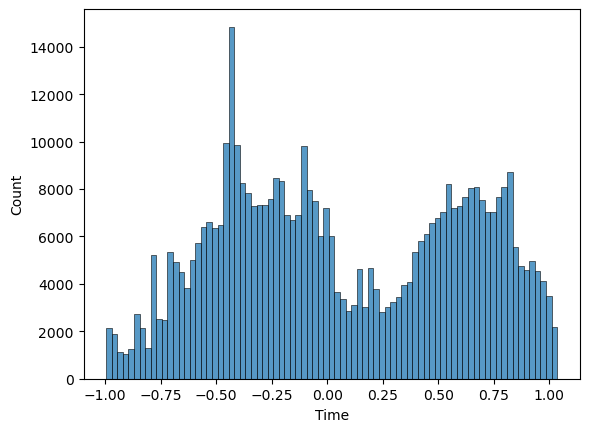

In [79]:
sns.histplot(adasyn_xgb["Time"])

### PCA Test

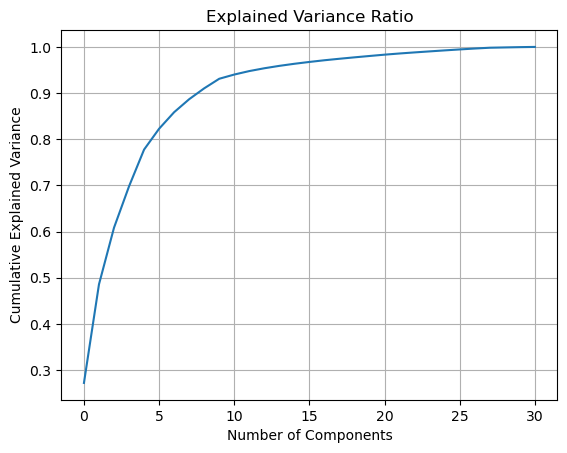

In [135]:
from sklearn.decomposition import PCA
pca = PCA()

# Fit PCA model to data
pca.fit(adasyn_xgb)

# Plot explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [81]:
adasyn_xgb.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,0.689153,0.866243,-0.318246,-0.258067,0.219853,-0.349083,0.161107,-0.594108,0.025441,0.891756,0.063149,0.437893,1.515383,0.968204,-0.330750,-0.308326,0.242945,-0.979336,0.655527,0.179461,-0.182470,0.645288,0.897861,0.208088,-0.402433,-0.092224,-0.289894,0.270724,-0.444900,-0.167819,1
1,0.381595,-0.187425,-0.493790,0.717314,-1.254993,-0.040991,0.379221,-0.019692,-0.791038,0.074024,0.711612,-1.273103,-0.846476,0.819542,-1.353996,0.473313,-0.228517,-1.771255,2.111227,-1.853612,-1.183107,-0.299044,0.387449,0.402712,-1.316024,-1.786733,0.729066,-2.296765,-1.188935,0.333962,1
2,0.762145,0.024329,0.538468,-0.386531,-0.433454,0.870514,-0.073053,0.664959,0.177093,-0.064380,-0.551175,0.369278,-0.207852,-0.758684,-0.751967,-0.690114,0.617066,0.124572,0.525736,0.213098,0.216694,-0.687578,-0.821494,0.305614,0.134996,-0.670877,0.302549,1.266659,0.449894,-0.139873,1
3,0.105476,-0.247384,0.676830,0.819183,1.752053,0.425328,1.093924,0.718356,-0.193443,0.341070,0.660548,-0.547691,-4.219203,0.229161,1.328640,-0.860367,1.404358,-0.619844,0.818848,-2.350028,-0.554807,0.224160,0.407738,-0.198912,0.512794,-1.005893,-0.226961,-0.582855,-0.580429,1.333613,1
4,-0.023931,-1.809043,1.306368,-0.317921,-0.006109,-0.614807,-0.176730,-0.423059,2.409441,0.473678,1.328816,0.336454,1.422038,0.603466,0.149211,-0.900094,0.077591,0.083175,-0.052198,0.774610,0.145495,-1.087925,-0.221450,0.846268,0.032014,0.680072,0.523781,1.763981,-2.544321,0.052540,1


In [136]:
adasyn_xgb_sampled = adasyn_xgb.sample(n=10000, random_state=42)

# Initialize PCA with desired number of components
pca = PCA(n_components=6)

# Fit PCA to the features
pca.fit(adasyn_xgb_sampled)

# Transform the features to their principal components
transformed_data = pca.transform(adasyn_xgb_sampled)

# Print the shape of original data and transformed data
print("Original data shape:", adasyn_xgb_sampled.shape)
print("Transformed data shape:", transformed_data.shape)

Original data shape: (10000, 31)
Transformed data shape: (10000, 6)


eps: 0.1, min_samples: 35, F1 score: 0.6690748545053181
eps: 0.1, min_samples: 36, F1 score: 0.6689853521503578
eps: 0.1, min_samples: 37, F1 score: 0.6689853521503578
eps: 0.1, min_samples: 38, F1 score: 0.6689406099518459
eps: 0.1, min_samples: 39, F1 score: 0.6689406099518459
eps: 0.1, min_samples: 40, F1 score: 0.6689406099518459
eps: 0.1, min_samples: 41, F1 score: 0.668851143506754
eps: 0.1, min_samples: 42, F1 score: 0.6687169887009426
eps: 0.1, min_samples: 43, F1 score: 0.6687169887009426
eps: 0.1, min_samples: 44, F1 score: 0.6687169887009426
eps: 0.1, min_samples: 45, F1 score: 0.6667555496300247
eps: 0.1, min_samples: 46, F1 score: 0.6667555496300247
eps: 0.1, min_samples: 47, F1 score: 0.6667555496300247
eps: 0.1, min_samples: 48, F1 score: 0.6667555496300247
eps: 0.1, min_samples: 49, F1 score: 0.6667555496300247
eps: 0.2, min_samples: 35, F1 score: 0.697194950911641
eps: 0.2, min_samples: 36, F1 score: 0.6922327394209354
eps: 0.2, min_samples: 37, F1 score: 0.69218456399

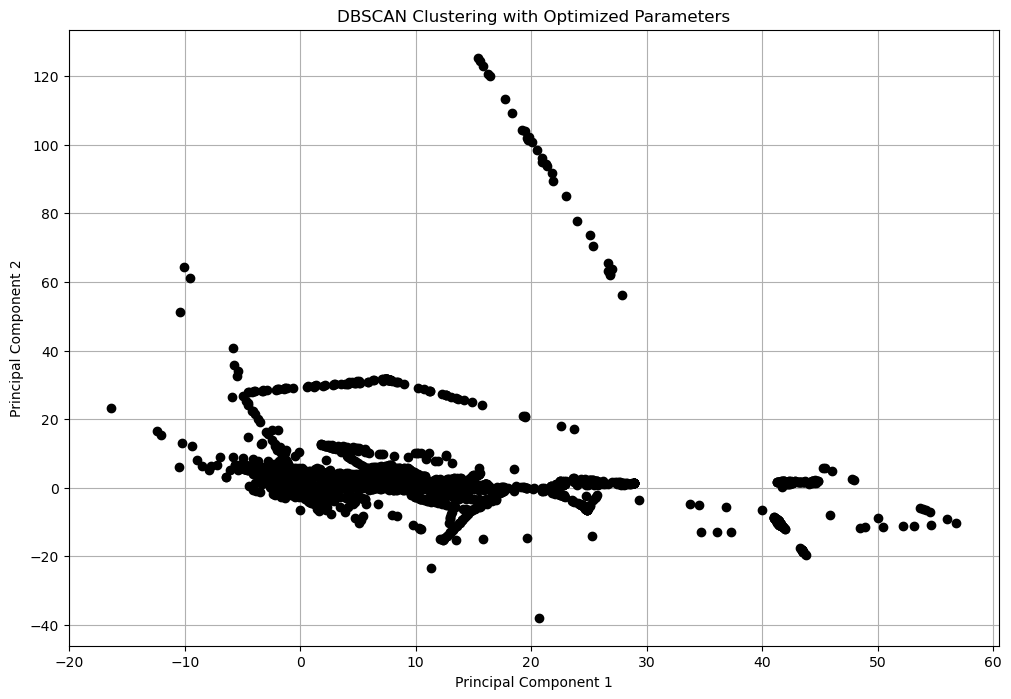

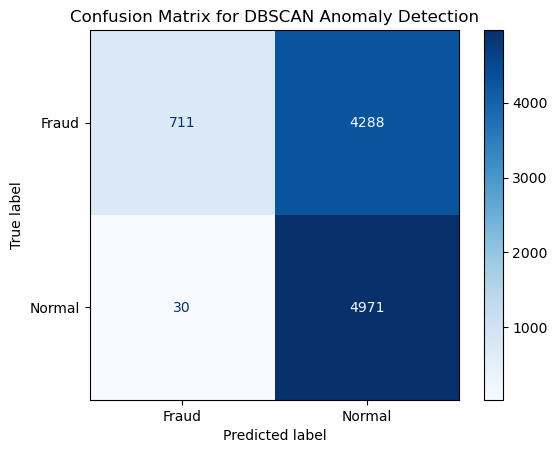

Confusion Matrix:
[[ 711 4288]
 [  30 4971]]


In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler

# Assuming transformed_data is your PCA-transformed data
# Assuming adasyn_xgb_sampled['target'] contains the fraud labels (1 for fraud, 0 for normal)

# Scale the data
scaler = RobustScaler()
scaled_data = scaler.fit_transform(transformed_data)

# Define the parameter grid with a finer search
eps_values = np.arange(0.1, 1.5, 0.1)
min_samples_values = range(35, 50, 1)

# Custom function to evaluate DBSCAN performance based on F1 score
def evaluate_dbscan(data, true_labels, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)

    # Convert cluster labels to binary anomaly labels: -1 (noise) -> 1 (anomaly), other -> 0 (normal)
    predicted_labels = (clusters == -1).astype(int)

    # Calculate F1 score
    score = f1_score(true_labels, predicted_labels)
    return score

# Perform grid search
best_score = -1
best_params = {'eps': None, 'min_samples': None}
true_labels = adasyn_xgb_sampled['target']

for eps in eps_values:
    for min_samples in min_samples_values:
        score = evaluate_dbscan(scaled_data, true_labels, eps, min_samples)
        print(f"eps: {eps}, min_samples: {min_samples}, F1 score: {score}")
        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Best Parameters: {best_params}, Best F1 Score: {best_score}")

# Apply DBSCAN with the best parameters
dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
clusters = dbscan.fit_predict(scaled_data)

# Plot the results
plt.figure(figsize=(12, 8))
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (clusters == k)
    xy = scaled_data[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering with Optimized Parameters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Create confusion matrix
predicted_labels = (clusters == -1).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fraud', 'Normal'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for DBSCAN Anomaly Detection')
plt.show()

# Print confusion matrix values
print("Confusion Matrix:")
print(cm)


### BASE

eps: 0.1, min_samples: 10, Recall: 0.9748050389922016
eps: 0.1, min_samples: 11, Recall: 0.9772045590881824
eps: 0.1, min_samples: 12, Recall: 0.9796040791841631
eps: 0.1, min_samples: 13, Recall: 0.9822035592881424
eps: 0.1, min_samples: 14, Recall: 0.9848030393921215
eps: 0.1, min_samples: 15, Recall: 0.9904019196160768
eps: 0.1, min_samples: 16, Recall: 0.9906018796240752
eps: 0.1, min_samples: 17, Recall: 0.9908018396320736
eps: 0.1, min_samples: 18, Recall: 0.991001799640072
eps: 0.1, min_samples: 19, Recall: 0.9948010397920416
eps: 0.1, min_samples: 20, Recall: 0.9958008398320336
eps: 0.1, min_samples: 21, Recall: 0.9958008398320336
eps: 0.1, min_samples: 22, Recall: 1.0
eps: 0.1, min_samples: 23, Recall: 1.0
eps: 0.1, min_samples: 24, Recall: 1.0
eps: 0.1, min_samples: 25, Recall: 1.0
eps: 0.1, min_samples: 26, Recall: 1.0
eps: 0.1, min_samples: 27, Recall: 1.0
eps: 0.1, min_samples: 28, Recall: 1.0
eps: 0.1, min_samples: 29, Recall: 1.0
eps: 0.2, min_samples: 10, Recall: 0.8872

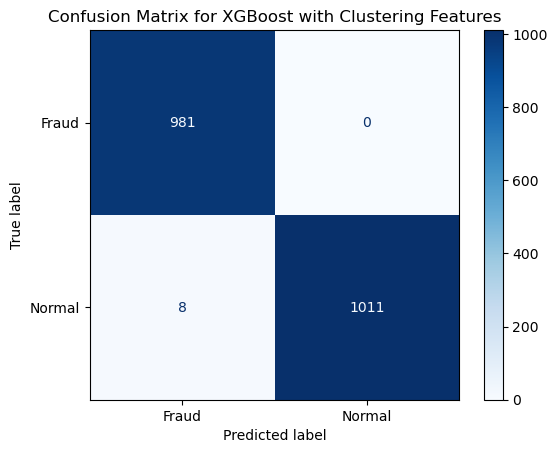

Confusion Matrix:
[[ 981    0]
 [   8 1011]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       981
           1       1.00      0.99      1.00      1019

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



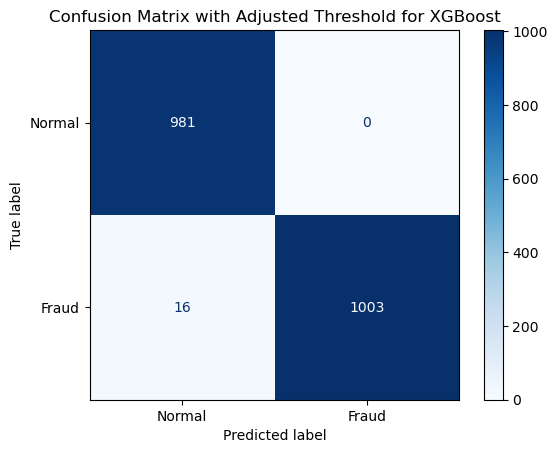

Confusion Matrix (Adjusted Threshold):
[[ 981    0]
 [  16 1003]]

Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       981
           1       1.00      0.98      0.99      1019

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Assuming transformed_data is your PCA-transformed data
# Assuming adasyn_xgb_sampled['target'] contains the fraud labels (1 for fraud, 0 for normal)

# Scale the data
scaler = RobustScaler()
scaled_data = scaler.fit_transform(transformed_data)

# Define the parameter grid with a finer search
eps_values = np.arange(0.1, 1.1, 0.1)
min_samples_values = range(10, 30, 1)

# Custom function to evaluate DBSCAN performance based on Recall or F1 score
def evaluate_dbscan(data, true_labels, eps, min_samples, metric='recall'):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)

    # Convert cluster labels to binary anomaly labels: -1 (noise) -> 1 (anomaly), other -> 0 (normal)
    predicted_labels = (clusters == -1).astype(int)

    if metric == 'recall':
        score = recall_score(true_labels, predicted_labels)
    elif metric == 'f1':
        score = f1_score(true_labels, predicted_labels)
    else:
        raise ValueError("Unsupported metric. Use 'recall' or 'f1'.")

    return score

# Perform grid search
best_score = -1
best_params = {'eps': None, 'min_samples': None}
true_labels = adasyn_xgb_sampled['target']

for eps in eps_values:
    for min_samples in min_samples_values:
        score = evaluate_dbscan(scaled_data, true_labels, eps, min_samples, metric='recall')
        print(f"eps: {eps}, min_samples: {min_samples}, Recall: {score}")
        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Best Parameters: {best_params}, Best Recall: {best_score}")

# Apply DBSCAN with the best parameters
dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
clusters = dbscan.fit_predict(scaled_data)

# Add DBSCAN cluster labels as a feature
adasyn_xgb_sampled['cluster'] = clusters

# Split data into training and testing sets
X = adasyn_xgb_sampled.drop(columns=['target'])
y = adasyn_xgb_sampled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fraud', 'Normal'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost with Clustering Features')
plt.show()

# Print confusion matrix values and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Adjust decision threshold to improve recall
y_prob = xgb.predict_proba(X_test)[:, 1]
threshold = 0.7  # Adjust threshold as needed
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Create confusion matrix with adjusted threshold
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)

# Display confusion matrix with adjusted threshold
disp_adjusted = ConfusionMatrixDisplay(confusion_matrix=cm_adjusted, display_labels=['Normal', 'Fraud'])
disp_adjusted.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix with Adjusted Threshold for XGBoost')
plt.show()

# Print confusion matrix values and classification report with adjusted threshold
print("Confusion Matrix (Adjusted Threshold):")
print(cm_adjusted)
print("\nClassification Report (Adjusted Threshold):")
print(classification_report(y_test, y_pred_adjusted))


### Base All

eps: 0.1, min_samples: 10, F1 score: 0.7068290561113527
eps: 0.1, min_samples: 11, F1 score: 0.7030643072939146
eps: 0.1, min_samples: 12, F1 score: 0.6998071566316691
eps: 0.1, min_samples: 13, F1 score: 0.6947174881550102
eps: 0.1, min_samples: 14, F1 score: 0.6919078392806969
eps: 0.1, min_samples: 15, F1 score: 0.6918080871569243
eps: 0.1, min_samples: 16, F1 score: 0.6848216754216201
eps: 0.1, min_samples: 17, F1 score: 0.6832126852809376
eps: 0.1, min_samples: 18, F1 score: 0.6805822576215326
eps: 0.1, min_samples: 19, F1 score: 0.6813668424296377
eps: 0.1, min_samples: 20, F1 score: 0.6795387869277478
eps: 0.1, min_samples: 21, F1 score: 0.6781507455572956
eps: 0.1, min_samples: 22, F1 score: 0.6780557250355909
eps: 0.1, min_samples: 23, F1 score: 0.6777800365928034
eps: 0.1, min_samples: 24, F1 score: 0.6777800365928034
eps: 0.1, min_samples: 25, F1 score: 0.6764506966048965
eps: 0.1, min_samples: 26, F1 score: 0.6741709355621461
eps: 0.1, min_samples: 27, F1 score: 0.672810439

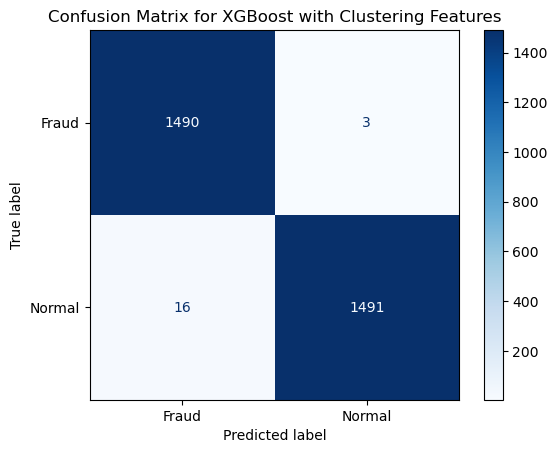

Confusion Matrix:
[[1490    3]
 [  16 1491]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1493
           1       1.00      0.99      0.99      1507

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



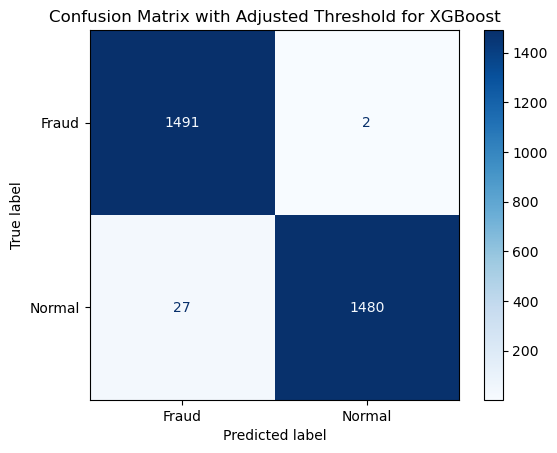

Confusion Matrix (Adjusted Threshold):
[[1491    2]
 [  27 1480]]

Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1493
           1       1.00      0.98      0.99      1507

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



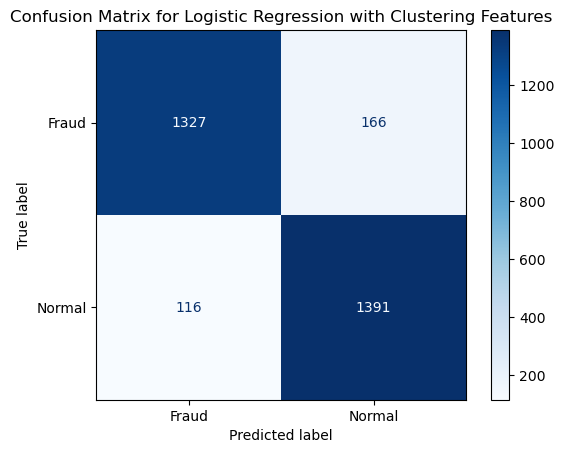

Confusion Matrix (Logistic Regression):
[[1327  166]
 [ 116 1391]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1493
           1       0.89      0.92      0.91      1507

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



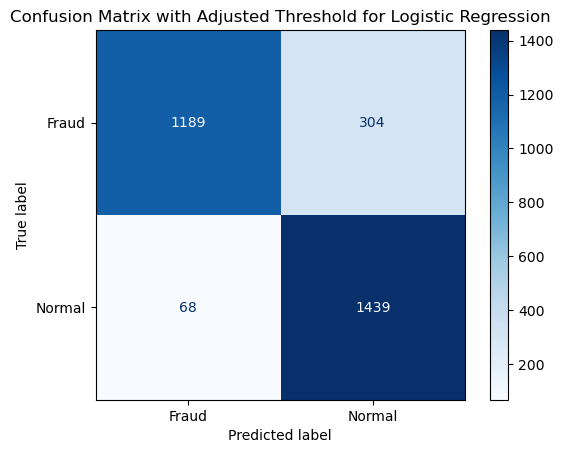

Confusion Matrix (Adjusted Threshold, Logistic Regression):
[[1189  304]
 [  68 1439]]

Classification Report (Adjusted Threshold, Logistic Regression):
              precision    recall  f1-score   support

           0       0.95      0.80      0.86      1493
           1       0.83      0.95      0.89      1507

    accuracy                           0.88      3000
   macro avg       0.89      0.88      0.88      3000
weighted avg       0.89      0.88      0.88      3000



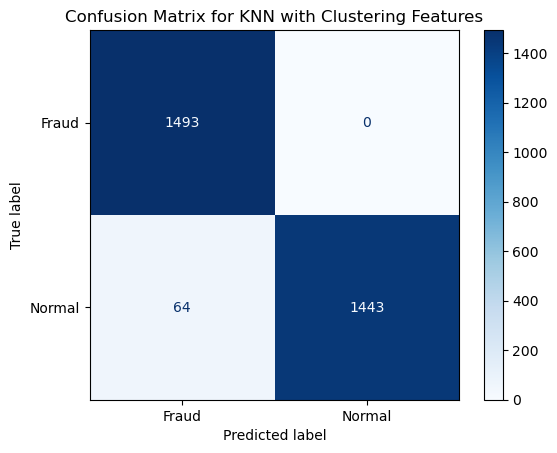

Confusion Matrix (KNN):
[[1493    0]
 [  64 1443]]

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1493
           1       1.00      0.96      0.98      1507

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Assuming transformed_data is your PCA-transformed data
# Assuming adasyn_xgb_sampled['target'] contains the fraud labels (1 for fraud, 0 for normal)

# Scale the data
scaler = RobustScaler()
scaled_data = scaler.fit_transform(transformed_data)

# Define the parameter grid with a finer search
eps_values = np.arange(0.1, 1.1, 0.1)
min_samples_values = range(10, 30, 1)

# Custom function to evaluate DBSCAN performance based on F1 score
def evaluate_dbscan(data, true_labels, eps, min_samples, metric='f1'):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)

    # Convert cluster labels to binary anomaly labels: -1 (noise) -> 1 (anomaly), other -> 0 (normal)
    predicted_labels = (clusters == -1).astype(int)

    if metric == 'recall':
        score = recall_score(true_labels, predicted_labels)
    elif metric == 'f1':
        score = f1_score(true_labels, predicted_labels)
    else:
        raise ValueError("Unsupported metric. Use 'recall' or 'f1'.")

    return score

# Perform grid search
best_score = -1
best_params = {'eps': None, 'min_samples': None}
true_labels = adasyn_xgb_sampled['target']

for eps in eps_values:
    for min_samples in min_samples_values:
        score = evaluate_dbscan(scaled_data, true_labels, eps, min_samples, metric='f1')
        print(f"eps: {eps}, min_samples: {min_samples}, F1 score: {score}")
        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Best Parameters: {best_params}, Best F1 Score: {best_score}")

# Apply DBSCAN with the best parameters
dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
clusters = dbscan.fit_predict(scaled_data)

# Add DBSCAN cluster labels as a feature
adasyn_xgb_sampled['cluster'] = clusters

# Split data into training and testing sets
X = adasyn_xgb_sampled.drop(columns=['target'])
y = adasyn_xgb_sampled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### XGBoost Classifier
# Train an XGBoost classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fraud', 'Normal'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost with Clustering Features')
plt.show()

# Print confusion matrix values and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Adjust decision threshold to improve F1 score
y_prob = xgb.predict_proba(X_test)[:, 1]
threshold = 0.7 # Adjust threshold as needed
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Create confusion matrix with adjusted threshold
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)

# Display confusion matrix with adjusted threshold
disp_adjusted = ConfusionMatrixDisplay(confusion_matrix=cm_adjusted, display_labels=['Fraud', 'Normal'])
disp_adjusted.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix with Adjusted Threshold for XGBoost')
plt.show()

# Print confusion matrix values and classification report with adjusted threshold
print("Confusion Matrix (Adjusted Threshold):")
print(cm_adjusted)
print("\nClassification Report (Adjusted Threshold):")
print(classification_report(y_test, y_pred_adjusted))

### Logistic Regression
# Train a logistic regression classifier
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Create confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Display confusion matrix
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=['Fraud', 'Normal'])
disp_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression with Clustering Features')
plt.show()

# Print confusion matrix values and classification report
print("Confusion Matrix (Logistic Regression):")
print(cm_logreg)
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

# Adjust decision threshold to improve F1 score
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
threshold = 0.3  # Adjust threshold as needed
y_pred_adjusted_logreg = (y_prob_logreg >= threshold).astype(int)

# Create confusion matrix with adjusted threshold
cm_adjusted_logreg = confusion_matrix(y_test, y_pred_adjusted_logreg)

# Display confusion matrix with adjusted threshold
disp_adjusted_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_adjusted_logreg, display_labels=['Fraud', 'Normal'])
disp_adjusted_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix with Adjusted Threshold for Logistic Regression')
plt.show()

# Print confusion matrix values and classification report with adjusted threshold
print("Confusion Matrix (Adjusted Threshold, Logistic Regression):")
print(cm_adjusted_logreg)
print("\nClassification Report (Adjusted Threshold, Logistic Regression):")
print(classification_report(y_test, y_pred_adjusted_logreg))

### KNN Classifier
# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Create confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Display confusion matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Fraud', 'Normal'])
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN with Clustering Features')
plt.show()

# Print confusion matrix values and classification report
print("Confusion Matrix (KNN):")
print(cm_knn)
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

# Note: For KNN, adjusting the decision threshold is not straightforward as KNN does not output probabilities in the same way.


eps: 0.1, min_samples: 10, F1 score: 0.7068290561113527
eps: 0.1, min_samples: 11, F1 score: 0.7030643072939146
eps: 0.1, min_samples: 12, F1 score: 0.6998071566316691
eps: 0.1, min_samples: 13, F1 score: 0.6947174881550102
eps: 0.1, min_samples: 14, F1 score: 0.6919078392806969
eps: 0.1, min_samples: 15, F1 score: 0.6918080871569243
eps: 0.1, min_samples: 16, F1 score: 0.6848216754216201
eps: 0.1, min_samples: 17, F1 score: 0.6832126852809376
eps: 0.1, min_samples: 18, F1 score: 0.6805822576215326
eps: 0.1, min_samples: 19, F1 score: 0.6813668424296377
eps: 0.1, min_samples: 20, F1 score: 0.6795387869277478
eps: 0.1, min_samples: 21, F1 score: 0.6781507455572956
eps: 0.1, min_samples: 22, F1 score: 0.6780557250355909
eps: 0.1, min_samples: 23, F1 score: 0.6777800365928034
eps: 0.1, min_samples: 24, F1 score: 0.6777800365928034
eps: 0.1, min_samples: 25, F1 score: 0.6764506966048965
eps: 0.1, min_samples: 26, F1 score: 0.6741709355621461
eps: 0.1, min_samples: 27, F1 score: 0.672810439

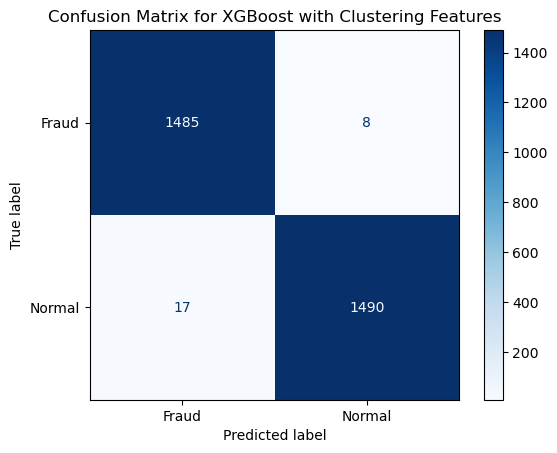

Confusion Matrix:
[[1485    8]
 [  17 1490]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1493
           1       0.99      0.99      0.99      1507

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



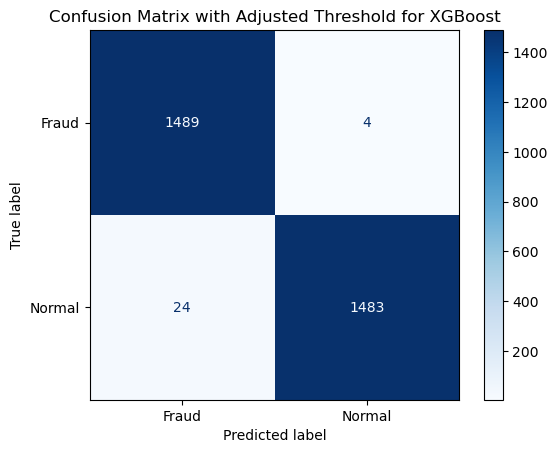

Confusion Matrix (Adjusted Threshold):
[[1489    4]
 [  24 1483]]

Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1493
           1       1.00      0.98      0.99      1507

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



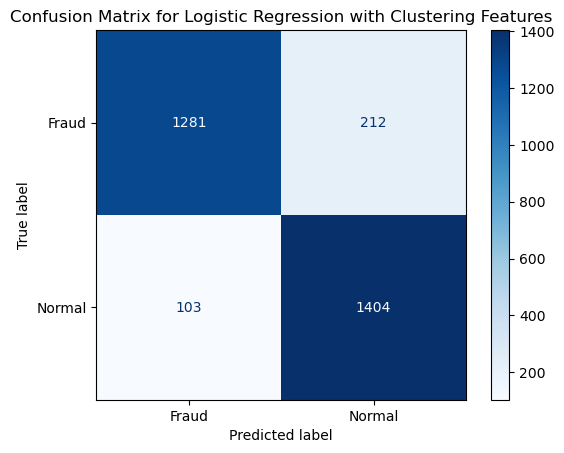

Confusion Matrix (Logistic Regression):
[[1281  212]
 [ 103 1404]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1493
           1       0.87      0.93      0.90      1507

    accuracy                           0.90      3000
   macro avg       0.90      0.89      0.89      3000
weighted avg       0.90      0.90      0.89      3000



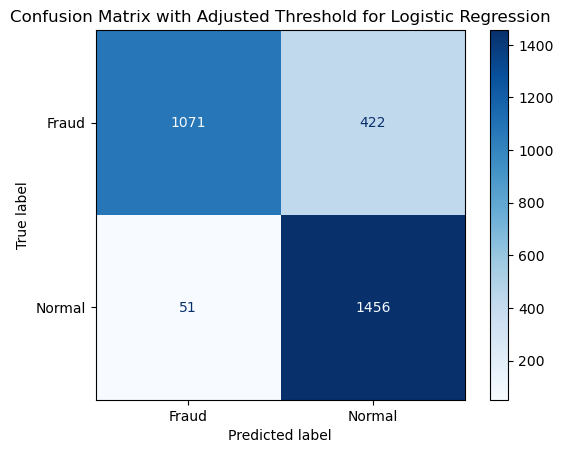

Confusion Matrix (Adjusted Threshold, Logistic Regression):
[[1071  422]
 [  51 1456]]

Classification Report (Adjusted Threshold, Logistic Regression):
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      1493
           1       0.78      0.97      0.86      1507

    accuracy                           0.84      3000
   macro avg       0.86      0.84      0.84      3000
weighted avg       0.86      0.84      0.84      3000



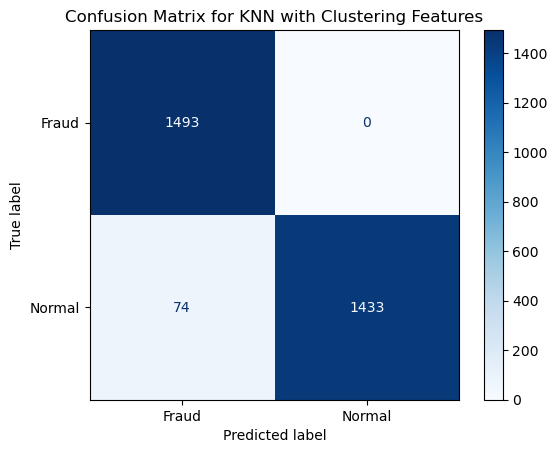

Confusion Matrix (KNN):
[[1493    0]
 [  74 1433]]

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1493
           1       1.00      0.95      0.97      1507

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Assuming transformed_data is your PCA-transformed data
# Assuming adasyn_xgb_sampled['target'] contains the fraud labels (1 for fraud, 0 for normal)

# Scale the data
scaler = RobustScaler()
scaled_data = scaler.fit_transform(transformed_data)

# Define the parameter grid with a finer search
eps_values = np.arange(0.1, 1.1, 0.1)
min_samples_values = range(10, 30, 1)

# Custom function to evaluate DBSCAN performance based on F1 score
def evaluate_dbscan(data, true_labels, eps, min_samples, metric='f1'):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)

    # Convert cluster labels to binary anomaly labels: -1 (noise) -> 1 (anomaly), other -> 0 (normal)
    predicted_labels = (clusters == -1).astype(int)

    if metric == 'recall':
        score = recall_score(true_labels, predicted_labels)
    elif metric == 'f1':
        score = f1_score(true_labels, predicted_labels)
    else:
        raise ValueError("Unsupported metric. Use 'recall' or 'f1'.")

    return score

# Perform grid search
best_score = -1
best_params = {'eps': None, 'min_samples': None}
true_labels = adasyn_xgb_sampled['target']

for eps in eps_values:
    for min_samples in min_samples_values:
        score = evaluate_dbscan(scaled_data, true_labels, eps, min_samples, metric='f1')
        print(f"eps: {eps}, min_samples: {min_samples}, F1 score: {score}")
        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Best Parameters: {best_params}, Best F1 Score: {best_score}")

# Apply DBSCAN with the best parameters
dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
clusters = dbscan.fit_predict(scaled_data)

# Add DBSCAN cluster labels as a feature
adasyn_xgb_sampled['cluster'] = clusters

# Split data into training and testing sets
X = adasyn_xgb_sampled.drop(columns=['target'])
y = adasyn_xgb_sampled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### XGBoost Classifier
# Train an XGBoost classifier
xgb = XGBClassifier(booster = 'gbtree', gamma = 0.1, learning_rate= 0.1, max_depth= 10, n_estimators= 200, use_label_encoder=False, eval_metric='logloss')

# xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fraud', 'Normal'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost with Clustering Features')
plt.show()

# Print confusion matrix values and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Adjust decision threshold to improve F1 score
y_prob = xgb.predict_proba(X_test)[:, 1]
threshold = 0.7  # Adjust threshold as needed
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Create confusion matrix with adjusted threshold
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)

# Display confusion matrix with adjusted threshold
disp_adjusted = ConfusionMatrixDisplay(confusion_matrix=cm_adjusted, display_labels=['Fraud', 'Normal'])
disp_adjusted.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix with Adjusted Threshold for XGBoost')
plt.show()

# Print confusion matrix values and classification report with adjusted threshold
print("Confusion Matrix (Adjusted Threshold):")
print(cm_adjusted)
print("\nClassification Report (Adjusted Threshold):")
print(classification_report(y_test, y_pred_adjusted))

### Logistic Regression
# Train a logistic regression classifier
logreg = LogisticRegression(random_state=42, C = 0.01, penalty = 'l2',  max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Create confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Display confusion matrix
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=['Fraud', 'Normal'])
disp_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression with Clustering Features')
plt.show()

# Print confusion matrix values and classification report
print("Confusion Matrix (Logistic Regression):")
print(cm_logreg)
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

# Adjust decision threshold to improve F1 score
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
threshold = 0.7  # Adjust threshold as needed
y_pred_adjusted_logreg = (y_prob_logreg >= threshold).astype(int)

# Create confusion matrix with adjusted threshold
cm_adjusted_logreg = confusion_matrix(y_test, y_pred_adjusted_logreg)

# Display confusion matrix with adjusted threshold
disp_adjusted_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_adjusted_logreg, display_labels=['Fraud', 'Normal'])
disp_adjusted_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix with Adjusted Threshold for Logistic Regression')
plt.show()

# Print confusion matrix values and classification report with adjusted threshold
print("Confusion Matrix (Adjusted Threshold, Logistic Regression):")
print(cm_adjusted_logreg)
print("\nClassification Report (Adjusted Threshold, Logistic Regression):")
print(classification_report(y_test, y_pred_adjusted_logreg))

### KNN Classifier
# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Create confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Display confusion matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Fraud', 'Normal'])
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN with Clustering Features')
plt.show()

# Print confusion matrix values and classification report
print("Confusion Matrix (KNN):")
print(cm_knn)
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

# Note: For KNN, adjusting the decision threshold is not straightforward as KNN does not output probabilities in the same way.


eps: 0.1, min_samples: 10, F1 score: 0.7068290561113527
eps: 0.1, min_samples: 11, F1 score: 0.7030643072939146
eps: 0.1, min_samples: 12, F1 score: 0.6998071566316691
eps: 0.1, min_samples: 13, F1 score: 0.6947174881550102
eps: 0.1, min_samples: 14, F1 score: 0.6919078392806969
eps: 0.1, min_samples: 15, F1 score: 0.6918080871569243
eps: 0.1, min_samples: 16, F1 score: 0.6848216754216201
eps: 0.1, min_samples: 17, F1 score: 0.6832126852809376
eps: 0.1, min_samples: 18, F1 score: 0.6805822576215326
eps: 0.1, min_samples: 19, F1 score: 0.6813668424296377
eps: 0.1, min_samples: 20, F1 score: 0.6795387869277478
eps: 0.1, min_samples: 21, F1 score: 0.6781507455572956
eps: 0.1, min_samples: 22, F1 score: 0.6780557250355909
eps: 0.1, min_samples: 23, F1 score: 0.6777800365928034
eps: 0.1, min_samples: 24, F1 score: 0.6777800365928034
eps: 0.1, min_samples: 25, F1 score: 0.6764506966048965
eps: 0.1, min_samples: 26, F1 score: 0.6741709355621461
eps: 0.1, min_samples: 27, F1 score: 0.672810439

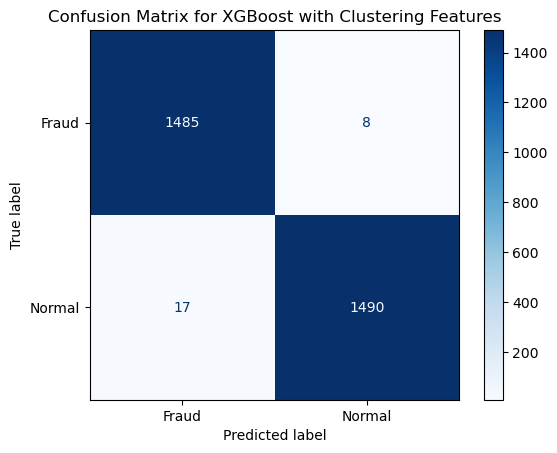

Confusion Matrix:
[[1485    8]
 [  17 1490]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1493
           1       0.99      0.99      0.99      1507

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



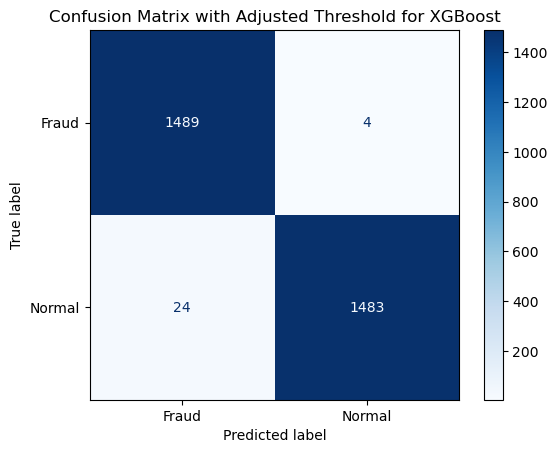

Confusion Matrix (Adjusted Threshold):
[[1489    4]
 [  24 1483]]

Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1493
           1       1.00      0.98      0.99      1507

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



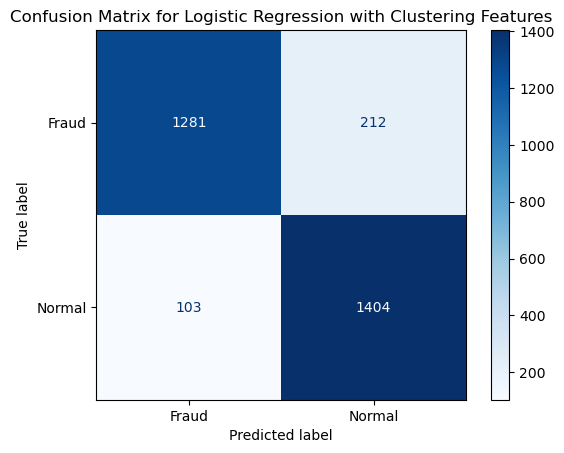

Confusion Matrix (Logistic Regression):
[[1281  212]
 [ 103 1404]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1493
           1       0.87      0.93      0.90      1507

    accuracy                           0.90      3000
   macro avg       0.90      0.89      0.89      3000
weighted avg       0.90      0.90      0.89      3000



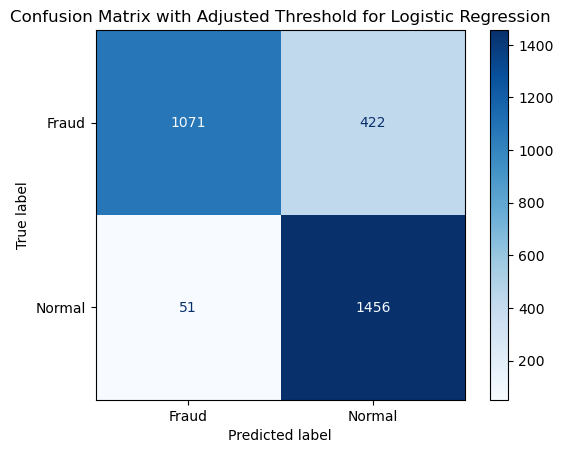

Confusion Matrix (Adjusted Threshold, Logistic Regression):
[[1071  422]
 [  51 1456]]

Classification Report (Adjusted Threshold, Logistic Regression):
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      1493
           1       0.78      0.97      0.86      1507

    accuracy                           0.84      3000
   macro avg       0.86      0.84      0.84      3000
weighted avg       0.86      0.84      0.84      3000



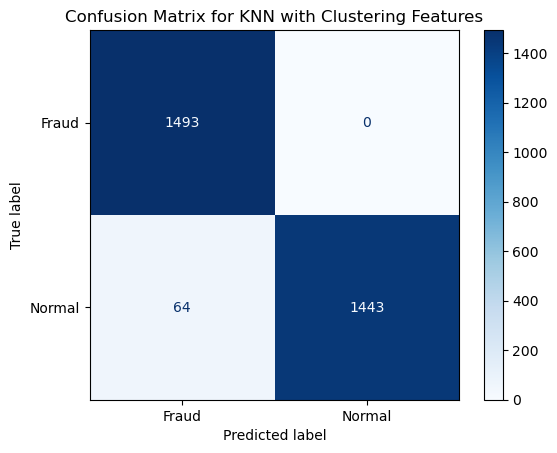

Confusion Matrix (KNN):
[[1493    0]
 [  64 1443]]

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1493
           1       1.00      0.96      0.98      1507

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Assuming transformed_data is your PCA-transformed data
# Assuming adasyn_xgb_sampled['target'] contains the fraud labels (1 for fraud, 0 for normal)

# Scale the data
scaler = RobustScaler()
scaled_data = scaler.fit_transform(transformed_data)

# Define the parameter grid with a finer search
eps_values = np.arange(0.1, 1.1, 0.1)
min_samples_values = range(10, 30, 1)

# Custom function to evaluate DBSCAN performance based on F1 score
def evaluate_dbscan(data, true_labels, eps, min_samples, metric='f1'):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)

    # Convert cluster labels to binary anomaly labels: -1 (noise) -> 1 (anomaly), other -> 0 (normal)
    predicted_labels = (clusters == -1).astype(int)

    if metric == 'recall':
        score = recall_score(true_labels, predicted_labels)
    elif metric == 'f1':
        score = f1_score(true_labels, predicted_labels)
    else:
        raise ValueError("Unsupported metric. Use 'recall' or 'f1'.")

    return score

# Perform grid search
best_score = -1
best_params = {'eps': None, 'min_samples': None}
true_labels = adasyn_xgb_sampled['target']

for eps in eps_values:
    for min_samples in min_samples_values:
        score = evaluate_dbscan(scaled_data, true_labels, eps, min_samples, metric='f1')
        print(f"eps: {eps}, min_samples: {min_samples}, F1 score: {score}")
        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Best Parameters: {best_params}, Best F1 Score: {best_score}")

# Apply DBSCAN with the best parameters
dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
clusters = dbscan.fit_predict(scaled_data)

# Add DBSCAN cluster labels as a feature
adasyn_xgb_sampled['cluster'] = clusters

# Split data into training and testing sets
X = adasyn_xgb_sampled.drop(columns=['target'])
y = adasyn_xgb_sampled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### XGBoost Classifier
# Train an XGBoost classifier
xgb = XGBClassifier(booster = 'gbtree', gamma = 0.1, learning_rate= 0.1, max_depth= 10, n_estimators= 200, use_label_encoder=False, eval_metric='logloss')

# xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fraud', 'Normal'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost with Clustering Features')
plt.show()

# Print confusion matrix values and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Adjust decision threshold to improve F1 score
y_prob = xgb.predict_proba(X_test)[:, 1]
threshold = 0.7  # Adjust threshold as needed
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Create confusion matrix with adjusted threshold
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)

# Display confusion matrix with adjusted threshold
disp_adjusted = ConfusionMatrixDisplay(confusion_matrix=cm_adjusted, display_labels=['Fraud', 'Normal'])
disp_adjusted.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix with Adjusted Threshold for XGBoost')
plt.show()

# Print confusion matrix values and classification report with adjusted threshold
print("Confusion Matrix (Adjusted Threshold):")
print(cm_adjusted)
print("\nClassification Report (Adjusted Threshold):")
print(classification_report(y_test, y_pred_adjusted))

### Logistic Regression
# Train a logistic regression classifier
# Best Parameters: {'model__C': 0.01, 'model__penalty': 'l2', 'sampling__n_neighbors': 5}
logreg = LogisticRegression(random_state=42, C = 0.01, penalty= 'l2', max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Create confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Display confusion matrix
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=['Fraud', 'Normal'])
disp_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression with Clustering Features')
plt.show()

# Print confusion matrix values and classification report
print("Confusion Matrix (Logistic Regression):")
print(cm_logreg)
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

# Adjust decision threshold to improve F1 score
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
threshold = 0.7  # Adjust threshold as needed
y_pred_adjusted_logreg = (y_prob_logreg >= threshold).astype(int)

# Create confusion matrix with adjusted threshold
cm_adjusted_logreg = confusion_matrix(y_test, y_pred_adjusted_logreg)

# Display confusion matrix with adjusted threshold
disp_adjusted_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_adjusted_logreg, display_labels=['Fraud', 'Normal'])
disp_adjusted_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix with Adjusted Threshold for Logistic Regression')
plt.show()

# Print confusion matrix values and classification report with adjusted threshold
print("Confusion Matrix (Adjusted Threshold, Logistic Regression):")
print(cm_adjusted_logreg)
print("\nClassification Report (Adjusted Threshold, Logistic Regression):")
print(classification_report(y_test, y_pred_adjusted_logreg))

### KNN Classifier
# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Create confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Display confusion matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Fraud', 'Normal'])
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN with Clustering Features')
plt.show()

# Print confusion matrix values and classification report
print("Confusion Matrix (KNN):")
print(cm_knn)
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

# Note: For KNN, adjusting the decision threshold is not straightforward as KNN does not output probabilities in the same way.


Number of anomalies detected: 265


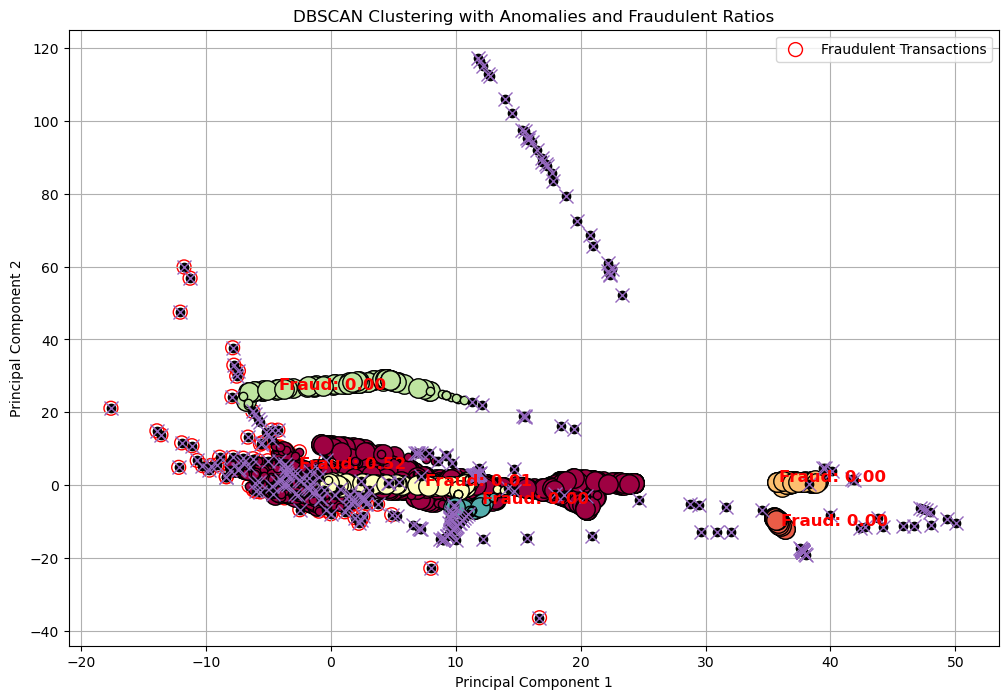

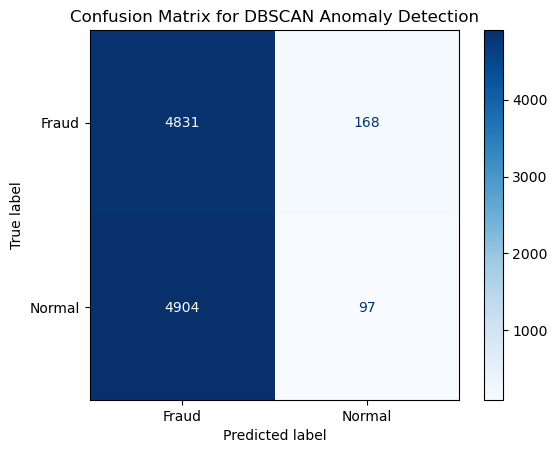

Confusion Matrix:
[[4831  168]
 [4904   97]]


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming transformed_data is your PCA-transformed data and adasyn_xgb_sampled['target'] contains the fraud labels

# Apply DBSCAN
dbscan = DBSCAN(eps=4.5, min_samples=17)
clusters = dbscan.fit_predict(transformed_data)

# Identify the core samples
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Anomalies (noise points)
anomalies = transformed_data[clusters == -1]
print('Number of anomalies detected:', len(anomalies))

# Create a DataFrame to store cluster labels and corresponding target labels
cluster_results = pd.DataFrame({'Cluster': clusters, 'Target': adasyn_xgb_sampled['target']})

# Compute the proportion of fraudulent transactions within each cluster
fraudulent_ratios = cluster_results.groupby('Cluster')['Target'].mean()

# Visualize the clusters, anomalies, and fraudulent transactions
plt.figure(figsize=(12, 8))

# Define colors for clusters
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise (anomalies)
        col = [0, 0, 0, 1]

    class_member_mask = (clusters == k)

    # Plot core samples
    xy = transformed_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    # Plot border samples
    xy = transformed_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# Plot anomalies (noise)
plt.plot(anomalies[:, 0], anomalies[:, 1], 'x', markerfacecolor='k', markersize=10)

# Highlight actual fraudulent transactions
fraud_mask = adasyn_xgb_sampled['target'] == 1
plt.scatter(transformed_data[fraud_mask, 0], transformed_data[fraud_mask, 1], edgecolors='r', facecolors='none', s=100, label='Fraudulent Transactions')

# Annotate clusters with fraudulent ratios
for cluster_label, fraudulent_ratio in fraudulent_ratios.items():
    if cluster_label != -1:  # Skip noise
        # Get the coordinates of the first core sample in the cluster for annotation
        cluster_points = transformed_data[clusters == cluster_label]
        core_sample_point = cluster_points[0]
        plt.text(core_sample_point[0], core_sample_point[1], f'Fraud: {fraudulent_ratio:.2f}', fontsize=12, weight='bold', color='red')

plt.title('DBSCAN Clustering with Anomalies and Fraudulent Ratios')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Create confusion matrix
true_labels = adasyn_xgb_sampled['target']
predicted_labels = (clusters == -1).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fraud', 'Normal'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for DBSCAN Anomaly Detection')
plt.show()

# Print confusion matrix values
print("Confusion Matrix:")
print(cm)


In [40]:
# clusters = dbscan.fit_predict(transformed_data)

# # Create a DataFrame to store cluster labels and corresponding target labels
# cluster_results = pd.DataFrame({'Cluster': clusters, 'Target': adasyn_xgb_sampled['target']})

# # Compute the proportion of fraudulent transactions within each cluster
# fraudulent_ratios = cluster_results.groupby('Cluster')['Target'].mean()

# # Print clusters with a high proportion of fraudulent transactions
# for cluster_label, fraudulent_ratio in fraudulent_ratios.items():
#     print(f"Cluster {cluster_label}:")
#     print(f"Fraudulent Ratio: {fraudulent_ratio:.2f}")
#     print()


Cluster -1:
Fraudulent Ratio: 0.84

Cluster 0:
Fraudulent Ratio: 0.40

Cluster 1:
Fraudulent Ratio: 1.00

Cluster 2:
Fraudulent Ratio: 1.00

Cluster 3:
Fraudulent Ratio: 1.00



18% of observations in cluster -1 is fradulent. 61% of cases in Cluster 0 is fraudulent

In [ ]:
adasyn_knn_sampled['target'].value_counts()

In [ ]:
adasyn_knn_sampled.head()

### Silhouette Score

- measure similarity between observation to its own cluster compared to other clusters
- ranges from -1 to 1
- ≈ 1 : well matched to its own cluster and poorly matched to neighboring

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(transformed_data, clusters)

### Adjusted Rand

- similarity between two clusterings
- ≈ 0 : random cluster assignment
- ≈ 1 precect similarity between true and predicted cluster

In [ ]:
from sklearn.metrics import adjusted_rand_score

true_labels = adasyn_knn_sampled['target']
adjusted_rand_score(true_labels, clusters)


### Calinski_harabasz_score and Davies_bouldin_score

- CH meanures ration between cluster dispersion to within-cluster dispersion
- high value = better-defined, more separate clusters

- DB evalutes avg similarites between each cluster and its more similar cluster, given cluster size
- lower value = better clustering (0 = perfectly separated clusters)

In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(transformed_data, clusters)
print("Calinski-Harabasz Index:", ch_score)

# Davies-Bouldin Index
db_score = davies_bouldin_score(transformed_data, clusters)
print("Davies-Bouldin Index:", db_score)


### Cluster Stability

- assesses the robustness of clustering results by measuring how stable the clusters are under perturbations of the data
- helps to determin how robust clustering algorithm is against variations
- ≈ 0 : stability between the cluster assignments across different bootstrap sample varies a lot

In [ ]:
from sklearn.metrics import adjusted_rand_score
import numpy as np
num_bootstraps = 100
cluster_assignments = np.zeros((len(adasyn_knn_sampled), num_bootstraps))

# Generate bootstrap samples and perform clustering
for i in range(num_bootstraps):
    # Generate a bootstrap sample
    bootstrap_sample = adasyn_knn_sampled.sample(n=len(adasyn_knn_sampled), replace=True, random_state=i)

    # Fit DBSCAN to the bootstrap sample
    clusters = dbscan.fit_predict(bootstrap_sample)

    # Store cluster assignments
    cluster_assignments[:, i] = clusters

# Compute Adjusted Rand Index between cluster assignments
ari_scores = np.zeros((num_bootstraps, num_bootstraps))
for i in range(num_bootstraps):
    for j in range(num_bootstraps):
        ari_scores[i, j] = adjusted_rand_score(cluster_assignments[:, i], cluster_assignments[:, j])


# Compute stability score
stability_score = np.mean(ari_scores)

print("Stability Score (Adjusted Rand Index):", stability_score)


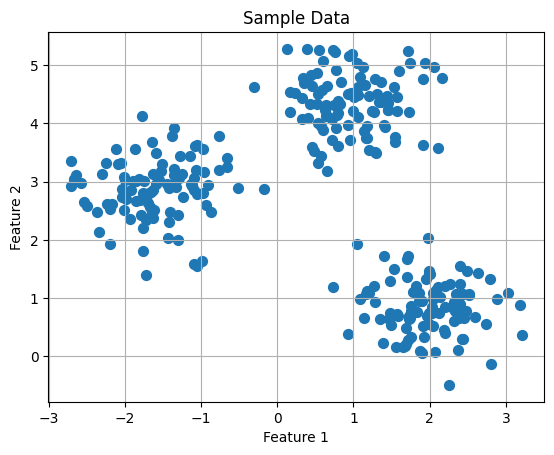

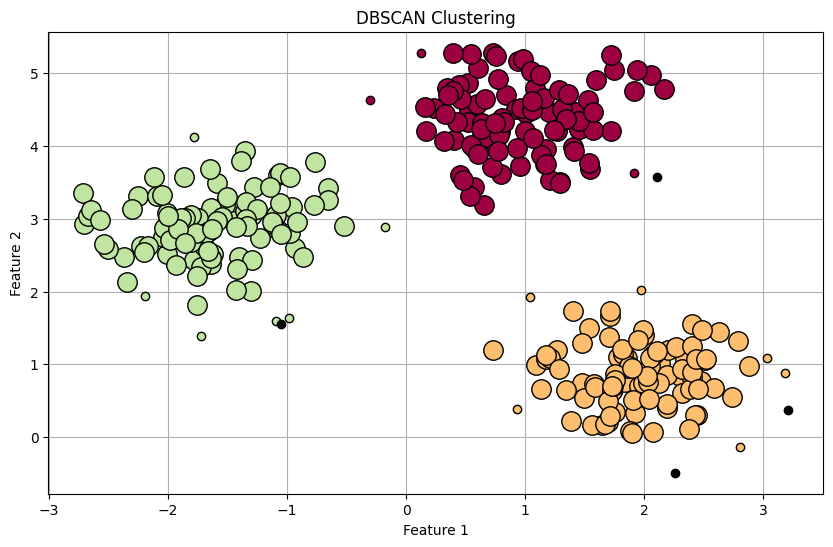

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.50, random_state=0)

# Plot the sample data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Sample Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify the core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Plot DBSCAN results
plt.figure(figsize=(10, 6))

# Unique labels including noise (-1)
unique_labels = set(labels)

# Define colors for clusters
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    # Plot border samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()
